# Model 2 - Anticline

A simple anticline structure. We start by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [2]:
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                          path_o = path_to_data + "model2_orientations.csv",
                          path_i = path_to_data + "model2_surface_points.csv") 

../../gempy/core/gempy_api.py:535: FutureWarning: create_data will get deprecated in the next version of gempy. It still exist only to keepthe behaviour equal to older version. Use init_data.
  "the behaviour equal to older version. Use init_data.", FutureWarning)


In [3]:
geo_data.get_data().head()

X    Y    Z     X_r     Y_r     Z_r surface  \
surface_points 0    0  100  200  0.2501  0.3001  0.3451   rock1   
               1    0  500  200  0.2501  0.5001  0.3451   rock1   
               2    0  900  200  0.2501  0.7001  0.3451   rock1   
               3  400  100  600  0.4501  0.3001  0.5451   rock1   
               4  400  500  600  0.4501  0.5001  0.5451   rock1   

                          series  id  order_series        smooth  G_x  G_y  \
surface_points 0  Default series   1             1  1.000000e-08  NaN  NaN   
               1  Default series   1             1  1.000000e-08  NaN  NaN   
               2  Default series   1             1  1.000000e-08  NaN  NaN   
               3  Default series   1             1  1.000000e-08  NaN  NaN   
               4  Default series   1             1  1.000000e-08  NaN  NaN   

                  G_z  dip  azimuth  polarity  
surface_points 0  NaN  NaN      NaN       NaN  
               1  NaN  NaN      NaN       NaN  
               2  NaN  NaN      NaN       NaN  
               3  NaN  NaN      NaN       NaN  
               4  NaN  NaN      NaN       NaN

Setting and ordering the units and series:

In [4]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock1,Strat_Series,1,False,#015482,1
1,rock2,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


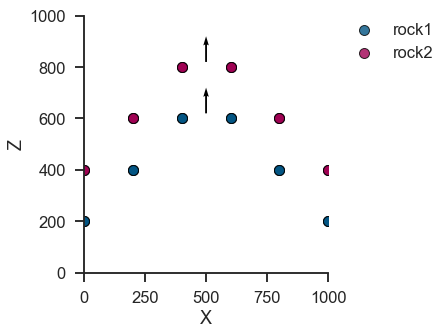

In [5]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [6]:
interp_data = gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [7]:
geo_data.update_to_interpolator()

In [8]:
geo_data.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
1,500,500,620,0.5001,0.5001,0.5551,1.000000e-12,1.000000e-12,1.0,0,90,1,rock1,Strat_Series,1,1,0.01
0,500,500,820,0.5001,0.5001,0.6551,1.000000e-12,1.000000e-12,1.0,0,90,1,rock2,Strat_Series,2,1,0.01


In [9]:
geo_data.interpolator.theano_graph.nugget_effect_grad_T.get_value()

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [20]:
sol = gp.compute_model(geo_data)

Displaying the result in y and x direction:

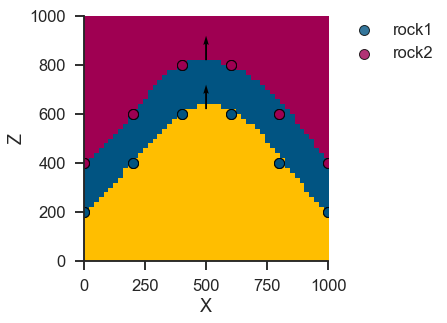

In [21]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=15,
                         direction='y', show_data=True)

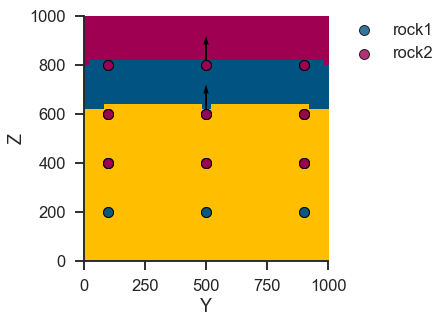

In [12]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_data=True)

In [13]:
vtkplot=gp.plot.plot_3D(geo_data)

holding... Use vtk.resume to go back to the interactive window


In [22]:
vtkplot.set_real_time_on()

In [15]:
a = geo_data.surface_points.df['X'] > 510
sel = geo_data.surface_points.df.index[a]
sel

Int64Index([21, 22, 23, 30, 31, 32, 33, 34, 35, 9, 10, 11, 12, 13, 14, 15, 16,
            17],
           dtype='int64')

In [24]:
geo_data.modify_surface_points(sel, smooth=1, plot_object=vtkplot)

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series,smooth
18,0.0,100.0,400.0,0.2501,0.3001,0.4451,rock2,Strat_Series,1,1,1.000000e-08
19,0.0,500.0,400.0,0.2501,0.5001,0.4451,rock2,Strat_Series,1,1,1.000000e-08
20,0.0,900.0,400.0,0.2501,0.7001,0.4451,rock2,Strat_Series,1,1,1.000000e-08
21,1000.0,100.0,400.0,0.7501,0.3001,0.4451,rock2,Strat_Series,1,1,1.000000e+00
22,1000.0,500.0,400.0,0.7501,0.5001,0.4451,rock2,Strat_Series,1,1,1.000000e+00
23,1000.0,900.0,400.0,0.7501,0.7001,0.4451,rock2,Strat_Series,1,1,1.000000e+00
24,400.0,100.0,800.0,0.4501,0.3001,0.6451,rock2,Strat_Series,1,1,1.000000e-08
25,400.0,500.0,800.0,0.4501,0.5001,0.6451,rock2,Strat_Series,1,1,1.000000e-08
26,400.0,900.0,800.0,0.4501,0.7001,0.6451,rock2,Strat_Series,1,1,1.000000e-08
27,200.0,100.0,600.0,0.3501,0.3001,0.5451,rock2,Strat_Series,1,1,1.000000e-08


In [19]:
geo_data.interpolator.theano_graph.nugget_effect_scalar_T.get_value()

array([1.e-08, 1.e-08, 1.e-08, 1.e+01, 1.e+01, 1.e+01, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e+01, 1.e+01, 1.e+01, 1.e+01,
       1.e+01, 1.e+01, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08, 1.e-08,
       1.e-08, 1.e-08, 1.e-08, 1.e+01, 1.e+01, 1.e+01, 1.e+01, 1.e+01,
       1.e+01, 1.e+01, 1.e+01, 1.e+01])